# Curso Data Science do Zero - Minerando Dados

## 5º Capítulo: Pre-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [1]:
import pandas as pd

##### cojunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [4]:
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


##### verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
Name: count, dtype: int64

##### lendo a base de dados

In [6]:
dataset = pd.read_csv('kc_house_data.csv')

##### contando o número de pisos

In [7]:
dataset['floors'].value_counts()

floors
1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [8]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [10]:
dataset['floors_labels'].unique()

['Muito-Pequeno', 'Pequeno', NaN, 'Grande', 'Medio', 'Muito-Grande']
Categories (5, object): ['Muito-Pequeno' < 'Pequeno' < 'Medio' < 'Grande' < 'Muito-Grande']

##### contagem de valores em cada bin ou categoria

In [11]:
dataset['floors_labels'].value_counts()

floors_labels
Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: count, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

##### importando as bibliotecas necessárias.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [13]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [14]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

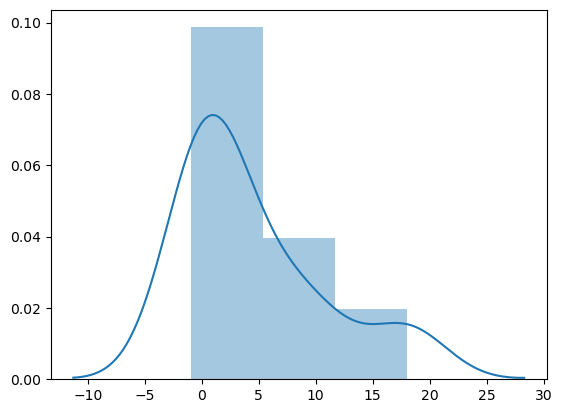

In [15]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

##### instanciando o objeto Normalize

In [16]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [17]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [18]:
data2 = data2.reshape(-1)

#### valor da média

In [19]:
print(np.mean(data2))

0.4475919008033141


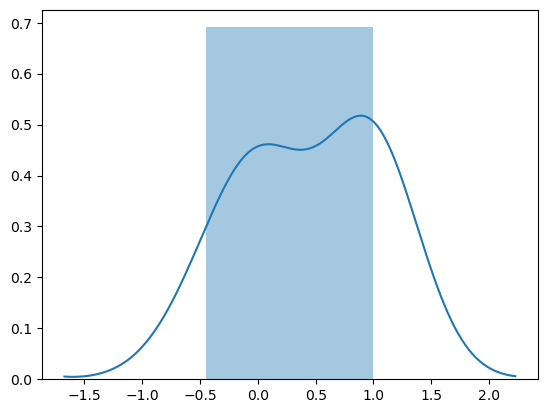

In [20]:
sns.distplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization

In [21]:
data = np.random.normal(size = 50)
print(data)

[-0.0571367  -0.13317261 -0.77884827 -1.17778896  0.48650358  1.3562809
 -0.35085266  0.80978167  0.66003469  0.02893518  1.07450732  1.39685038
  0.23508342 -0.26785344  0.20699036  0.5766587   0.25865303 -1.48157573
  0.06996329 -0.46108357 -0.27490532  0.99141969 -1.63028783 -0.53008633
  1.33043168 -0.24382065  1.30297162  0.10803639  0.47945606  0.45424982
  0.04863383  0.49794782  1.51340395 -1.37065793 -0.5341813   0.1054394
 -0.49461405  0.64218552 -0.0037178   1.93079852  0.23009542  0.86149247
 -0.6122736  -0.85067311  1.11080215  0.74763176  0.09749659  0.20800591
  0.78730421 -0.50525608]


#### Alterando a forma dos dados para apenas uma dimensão

In [22]:
data = data.reshape(-1,1)

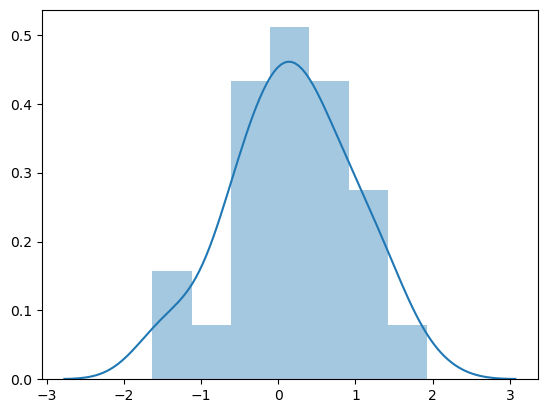

In [23]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [24]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [25]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [26]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.44176158]
 [0.42040969]
 [0.23909546]
 [0.12706765]
 [0.59442294]
 [0.83866788]
 [0.35928226]
 [0.68520369]
 [0.64315276]
 [0.4659317 ]
 [0.75954214]
 [0.85006032]
 [0.52382084]
 [0.38258954]
 [0.51593194]
 [0.61973968]
 [0.5304395 ]
 [0.04176032]
 [0.47745293]
 [0.32832797]
 [0.38060928]
 [0.73621004]
 [0.        ]
 [0.30895109]
 [0.83140908]
 [0.38933827]
 [0.82369793]
 [0.48814436]
 [0.5924439 ]
 [0.58536566]
 [0.47146334]
 [0.59763663]
 [0.8827901 ]
 [0.0729075 ]
 [0.30780117]
 [0.48741509]
 [0.31891217]
 [0.63814048]
 [0.45676231]
 [1.        ]
 [0.52242014]
 [0.69972476]
 [0.28587182]
 [0.21892609]
 [0.76973421]
 [0.66775117]
 [0.48518465]
 [0.51621712]
 [0.67889172]
 [0.31592375]]


#### Alterando a forma dos dados para apenas uma dimensão

In [27]:
data_scaled = data_scaled.reshape(-1,1)

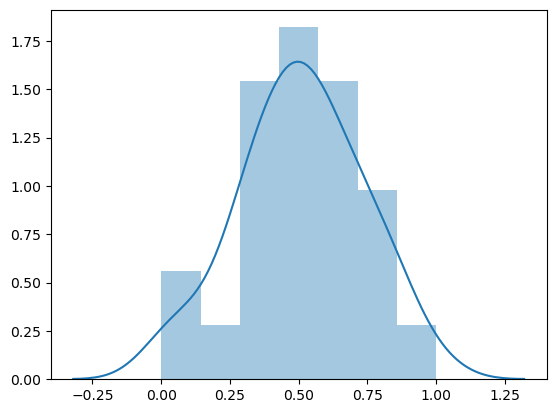

In [28]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [29]:
data = np.random.normal(size = 50)
print(data)

[ 0.37676743  0.16406803 -1.83756414 -0.90554333  0.98390623  1.38268742
  0.7467635  -0.16120597  0.31168891  0.22670961  0.88519606  0.24046898
  0.13906696 -0.23749697 -0.89196083  0.36712681  0.02368175 -0.83398219
 -1.18082035 -0.58995655 -0.44607489 -0.5000361  -1.53184562 -0.28483219
 -1.06557932  0.16324822  0.46949125 -0.50119549  0.55315401 -0.37046188
  1.61410418  0.11110963 -0.78321296 -0.73926869  0.30263979 -0.06482662
  0.46506663  0.90615347  1.45598816  0.8365894   0.33296197  1.44189717
 -0.28046711 -0.38714435  1.95845319  0.32620669  0.17938606  0.20510182
  0.06104952 -1.29166094]


#### Alterando a forma dos dados para apenas uma dimensão

In [30]:
data = data.reshape(-1,1)

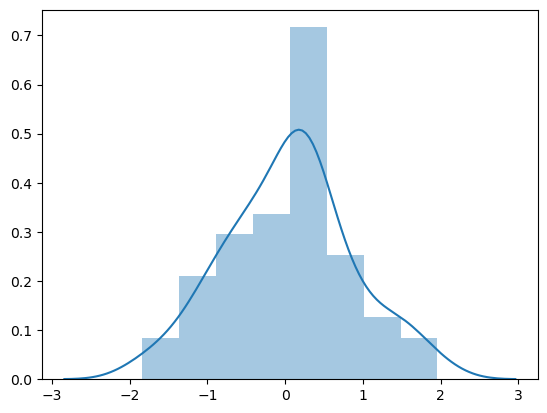

In [31]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [32]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [33]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [34]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.40636534]
 [ 0.14433042]
 [-2.32157949]
 [-1.17337685]
 [ 1.15432972]
 [ 1.64560805]
 [ 0.86218185]
 [-0.25639076]
 [ 0.32619189]
 [ 0.22150168]
 [ 1.03272377]
 [ 0.23845253]
 [ 0.11353036]
 [-0.35037742]
 [-1.15664389]
 [ 0.39448859]
 [-0.0286184 ]
 [-1.08521713]
 [-1.51250425]
 [-0.78458984]
 [-0.6073349 ]
 [-0.67381238]
 [-1.94494969]
 [-0.40869202]
 [-1.37053312]
 [ 0.14332045]
 [ 0.52059642]
 [-0.6752407 ]
 [ 0.62366472]
 [-0.51418348]
 [ 1.93070183]
 [ 0.07908833]
 [-1.022672  ]
 [-0.96853488]
 [ 0.31504383]
 [-0.13765625]
 [ 0.51514551]
 [ 1.05854225]
 [ 1.73591086]
 [ 0.97284282]
 [ 0.35239923]
 [ 1.71855148]
 [-0.40331447]
 [-0.53473544]
 [ 2.35492244]
 [ 0.34407706]
 [ 0.16320145]
 [ 0.19488197]
 [ 0.0174168 ]
 [-1.64905427]]


#### Alterando a forma dos dados para apenas uma dimensão

In [35]:
data_scaled = data_scaled.reshape(-1,1)

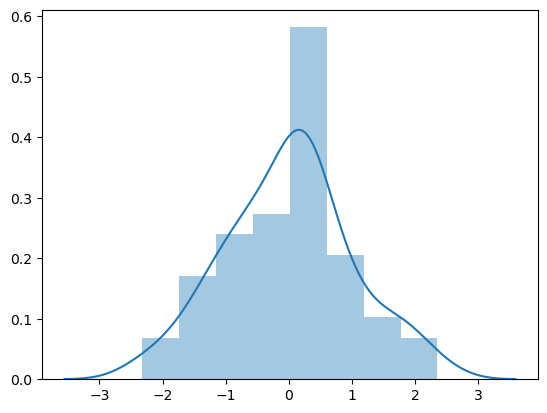

In [36]:
sns.distplot(data_scaled)
plt.show()